#### Tourism recommendation problem solving task

Q1 c:  Find out optimal number of traveller groups, report the outcome and justify your findings?

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans, DBSCAN, kmeans_plusplus
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import unique, where
import seaborn as sborn 

Q1C). Find out the optimal number of traveler groups, report the outcome and justify your findings

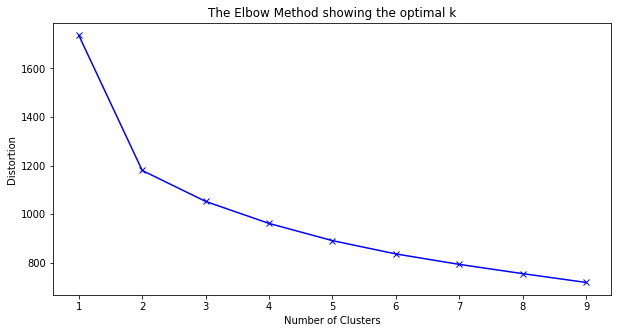

980


In [5]:
from operator import index

Trip_RecSys_data = pd.read_csv("tripadvisor_review.csv") #read TripAdvisor data from CSVFile
# Trip_RecSys_data.info()
# Trip_RecSys_data.shape
Trip_RecSys_data_ = Trip_RecSys_data.drop('User ID', axis=1)
# print(Trip_RecSys_data_.head)
distortions = []
KVal = range(1,10)

for k in KVal:
    #kmeanModel = kmeans_plusplus(Trip_RecSys_data_, n_clusters=k)
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(Trip_RecSys_data_)
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(10,5))
plt.plot(KVal, distortions, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
print(len(Trip_RecSys_data_))


2). Implement two alternative solutions of Q1 (c)

980
10


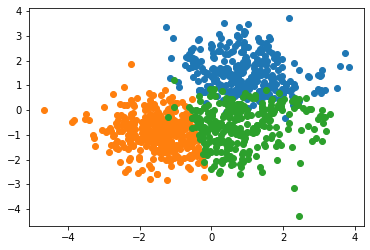

In [6]:
#KMeans classification

records = len(Trip_RecSys_data_)
features = len(Trip_RecSys_data_.columns)
elbow_value = 3

print(records)
print(features)
#define the dataset using Sklearn predefined make_classifiation() API
X, y = make_classification(n_samples=records, n_features=3, n_informative=3, n_redundant=0, n_clusters_per_class=1, random_state=4)
#make the model
model = KMeans(n_clusters=elbow_value)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()


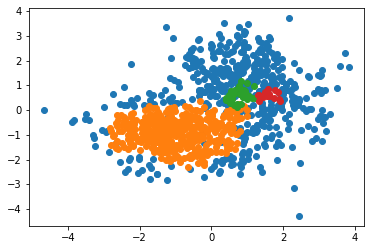

In [41]:
#DBScan (Density-Based Spatial Clustering of Application with Noise)
X, y = make_classification(n_samples=records, n_features=3, n_informative=3, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = DBSCAN(eps=0.40, min_samples=15)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

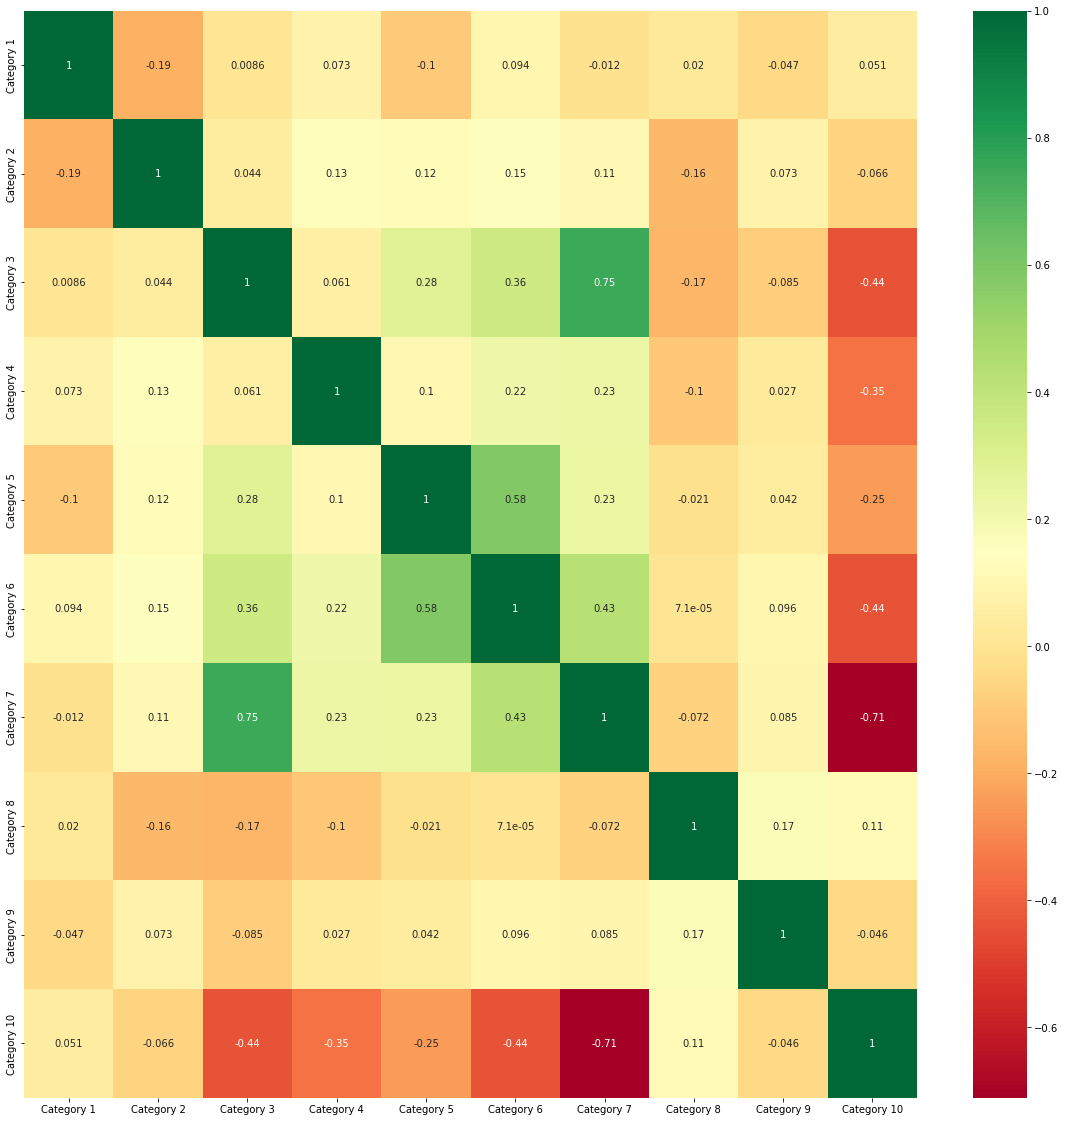

In [54]:
# importing or loading the dataset
Trip_RecSys_data = pd.read_csv("tripadvisor_review.csv") #read TripAdvisor data from CSVFile
tripcorr = Trip_RecSys_data_.corr()
top_corr_features = tripcorr.index
#plt.matshow(Trip_RecSys_data_.corr())
#plt.show()
plt.figure(figsize=(20,20))
g=sborn.heatmap(Trip_RecSys_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")